<a href="https://colab.research.google.com/github/AyraKhans/Projects/blob/main/Images%20and%20Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Image and Historgrams
### Question 1[10 points]:
####a) A camera with a focal length f=50 mm is used to take a photo of a vertical column that is 12-meter-high and 95 meters away from the camera. Determine its height in the image in mm and the number of pixels assuming the camera has a resolution of 300 pixel per inch.

# Use len's equation to calculate: Formula is 1/v + 1/u = 1/f

*  Image Distance is V
*  Object Distance is u
*  Focal Length is f

1.

Focal Length f = 50mm

Object distance u = 95m = 95000 mm

Substtituting in the known values you get,  1/ v + 1/ 95,000 = 1/50

Solving for v= 50.03mm

Magnification = 50.03 /95,000 = **5.26 x 10^-4** (negative because it's a reduction in size)

Image height = 5.26 x 10^-4 x 12,000 = **6.32 mm**

2.

First, convert the height from millimeters to inches:
1 inch = 25.4 mm

Image height (in inches) = 6.32 mm / 25.4 mm/inch ≈ **0.248** inches

Now, calculate the number of pixels:

Number of pixels = Image height (in inches) * Resolution (pixels per inch)

Number of pixels = 0.248 inches * 300 pixels/inch ≈ **74.4 pixels**







##[Q2 – 20 pts]
###Write an ImageJ plugin or Python function that counts the number of pixels of a given color in an image. Use this plugin to count the number of pixels with pure red (255,0,0), pure green (0,255,0), pure blue (0,0,255), white (255,255,255), and black (0,0,0) in an input image (generate such images at size 640x480 to test your code). Test your code on a selfie photo of you and report the result. Test your code on the image shapes.png and report the result.


Code for Image Shapes.png

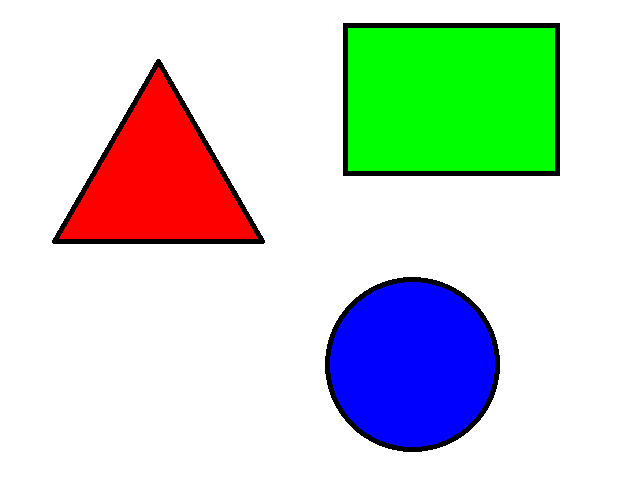

In [157]:
#PIL
import PIL
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt

#image address
Shapes = PIL.Image.open ("/content/sample_data/Shapes.png")
display(Shapes)


In [158]:
#check the size of the image
Shapes.size

(640, 480)

In [159]:
#convert to RGB
Shapes = Shapes.convert("RGB")
#colors count in an array
shape_colors = [
    (255,0,0),     #pure red
    (0,255,0),     #pure green
    (0,0,255),     #pure blue
    (255,255,255), #white
    (0,0,0) ]        #black


In [160]:
#convert the image into a numpy array
img_array = np.array(Shapes)
#store each count color in an array
color_counts = {color: np.sum(img_array == color) for color in shape_colors}


In [161]:
#print the counts for each color
for color in shape_colors:
    count = color_counts[color]
    print(f"Color {color}: {count} pixels")

#show image
#Shapes

Color (255, 0, 0): 350957 pixels
Color (0, 255, 0): 375765 pixels
Color (0, 0, 255): 359317 pixels
Color (255, 255, 255): 757161 pixels
Color (0, 0, 0): 164439 pixels


code for image Selfie.png

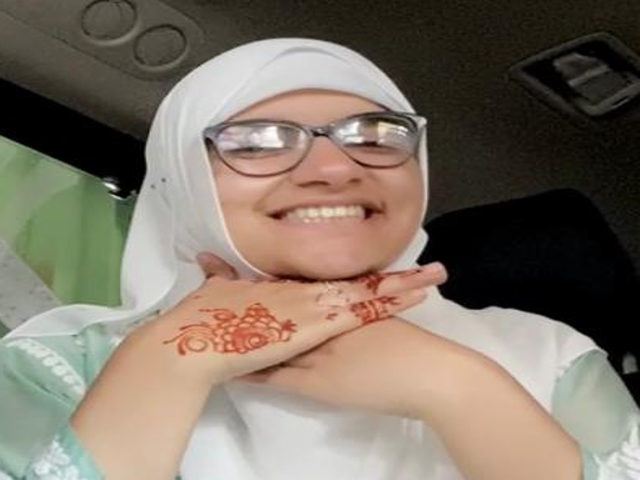

In [162]:
#PIL
import PIL
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt

#image address
Selfie = PIL.Image.open ("/content/sample_data/Selfie for HW2.png")


#change image size to 640 x 480
New_selfie = Selfie.resize((640,480))
#save new image
New_selfie.save("/content/sample_data/Selfie for HW2.png")
display(New_selfie)


In [163]:
#check the size of the image
New_selfie.size

(640, 480)

In [164]:
#convert to RGB
New_selfie = New_selfie.convert("RGB")
#colors count in an array
selfie_colors = [
    (255,0,0),     #pure red
    (0,255,0),     #pure green
    (0,0,255),     #pure blue
    (255,255,255), #white
    (0,0,0) ]        #black

In [165]:
#convert the image into a numpy array
img_array = np.array(New_selfie)
#store each count color in an array
color_counts = {color: np.sum(img_array == color) for color in selfie_colors}


In [166]:
#print the counts for each color
for color in selfie_colors:
    count = color_counts[color]
    print(f"Color {color}: {count} pixels")
#show image
#New_selfie

Color (255, 0, 0): 36918 pixels
Color (0, 255, 0): 36367 pixels
Color (0, 0, 255): 36651 pixels
Color (255, 255, 255): 28 pixels
Color (0, 0, 0): 54954 pixels


##Q3[30 points]
##Take a selfie with your cell-phone camera of your face and download it to your computer.
*   a) Use ImageJ to plot the R,G,B component histograms.
*   b) Convert the image to grayscale by averaging the R,G,B channel. Compute and plot the luminance (Brightness) histogram (histogram of the grayscale image).
*   c) Comment about the image defects that you can notice from these histograms, including problems with contrast, exposure, dynamic range, and compression effect.

In [167]:
#import PIL
from PIL import Image
#import cv
import cv2
# import numpy, N-dim array and matrix library
import numpy as np

# import matplotlib pyplot for plotting
import matplotlib.pyplot as plt

In [168]:
#open image using Pillow
histo = New_selfie

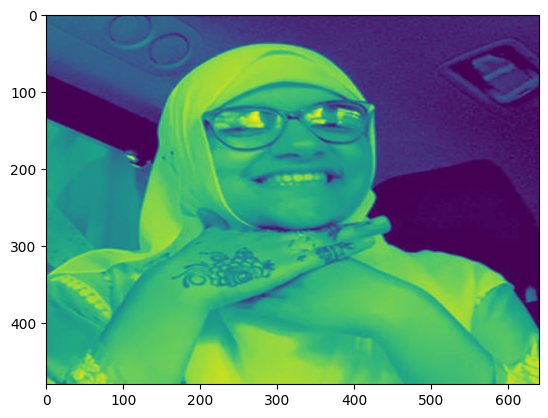

In [169]:
#a) plot the RGB components of the histogram
hist_convert = histo.convert('L')

plt.imshow(hist_convert)
plt.show()

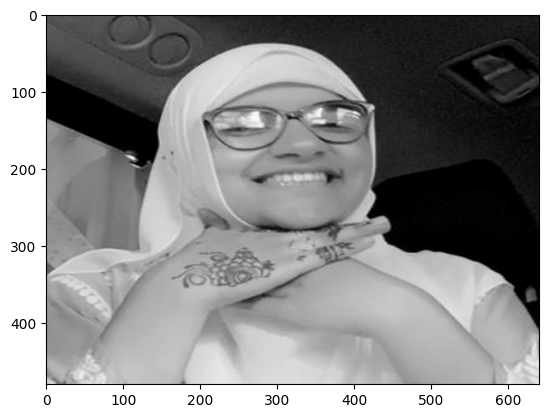

In [170]:
# b) convert image to grayscale
hist_convert = histo.convert('F')

plt.imshow(hist_convert)
plt.show()

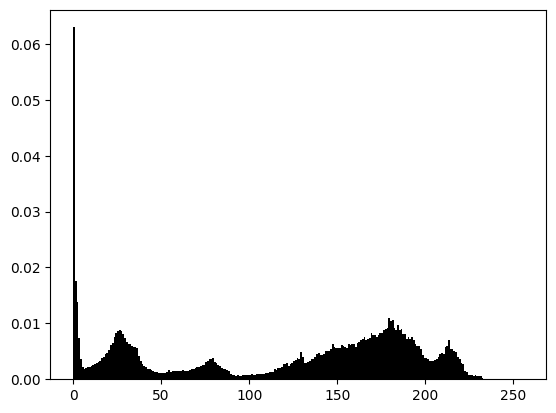

In [171]:
#b) plot the luminance (brightness)h istogram of the grayscale image
#first connvert to a numpy array
lum = np.array(hist_convert.histogram())

plt.hist(hist_convert.getdata(), bins=256, range=(0,256), density=True, color='black')

plt.show()

c) I immediately noticed the high peak in the beginning indicating that this image has many darker regions which means its underexposed (the image was captured with insufficient exposure to light). As a result many areas in the image are too dark, and details in those areas may be lost.  The presence of a high peak at the beginning can result in low image contrast. A histogram peak at the beginning can also suggest that some pixel values are clipped or crushed at the lower end due to underexposure, which may result in permanent loss of information. You can also make an inference that the image has a low dynamic range across the histogram.

# Question 4 - 40 points
##Take a selfie with your cell-phone camera of your face and download it to your computer (you can use the image from the previous question). Open the image and convert it to gray scale (you can use the grayscale mode when opening the image)
###a) Implement a gamma correction function (do not use built in gamma correction functions)
###b) Apply gamma correction on your grayscale image with gamma=0.25, 0.5, 2, 4
###c) For each case show the resulting image and its histogram.
###d) Which of the images (including the original downloaded image) you think gives the most faithful visualization compare to what you see on your phone.
###e) Apply built-in histogram equalization function (or implement your own) on your image and show the result, and the histogram of the result.

In [172]:
def gamma_correction(img, gamma):
    # Convert the image to a NumPy array
    img_array = np.array(img)

    corrected_img = (img_array / 255.0) ** (1.0 / gamma) * 255.0
    corrected_img = corrected_img.astype(np.uint8)

    # Display the corrected image
    plt.imshow(corrected_img, cmap='gray')
    plt.title(f'Gamma: {gamma}')
    plt.show()

    # Plot the histogram of the corrected image
    plt.hist(corrected_img.flatten(), bins=256, range=(0, 256), density=True, color='black')
    plt.xlim([0, 256])
    plt.title('Histogram')
    plt.show()



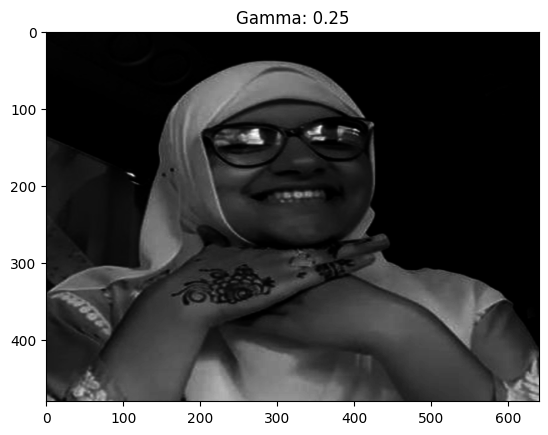

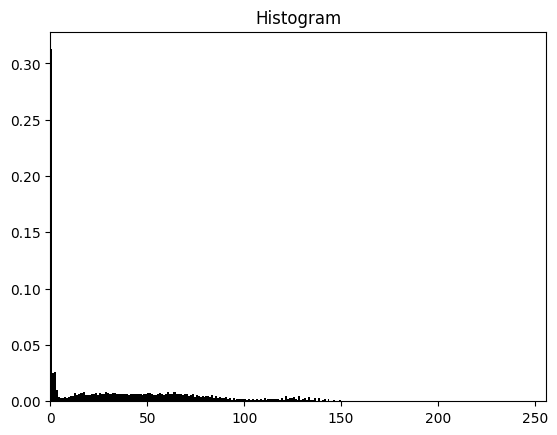

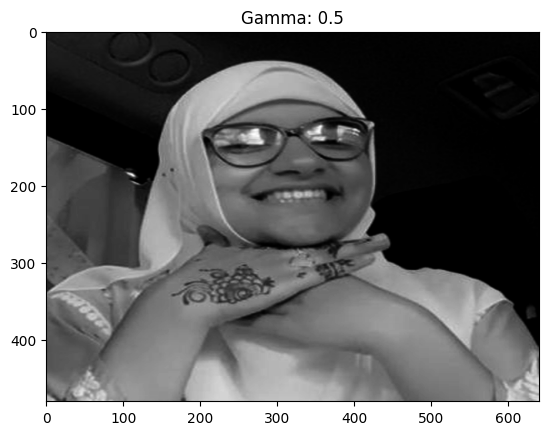

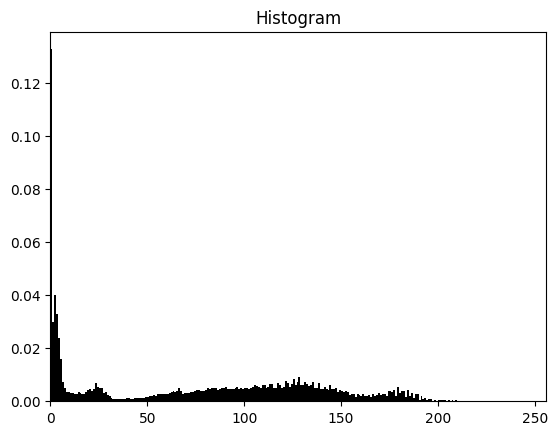

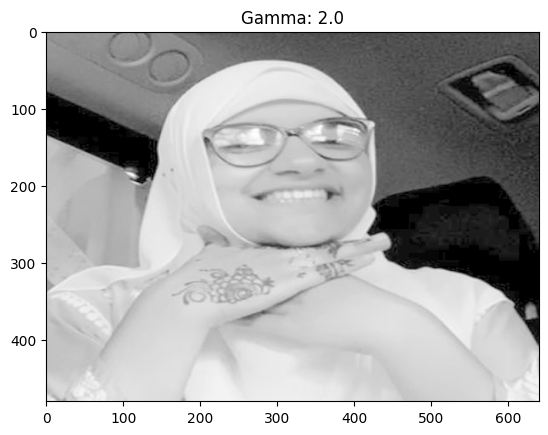

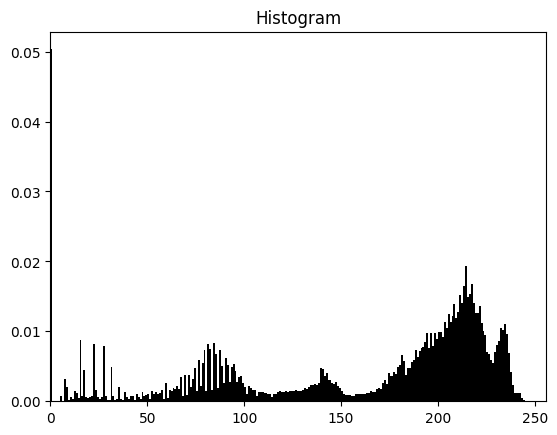

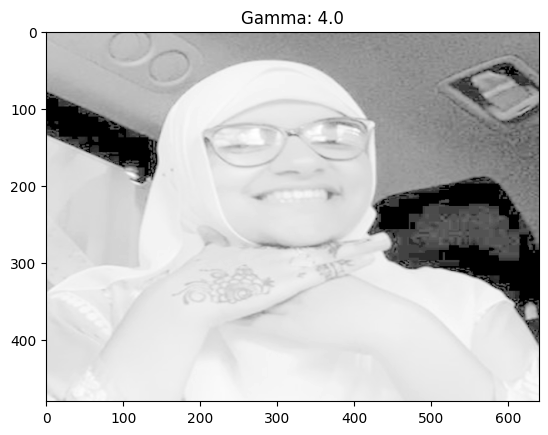

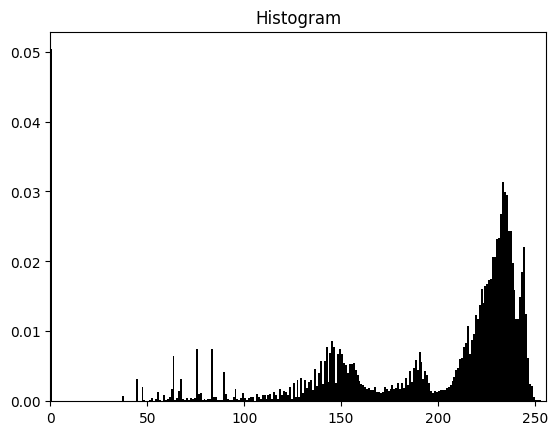

In [173]:
#b) Apply gamma correction with different gamma values
gamma_correction(hist_convert, 0.25)
gamma_correction(hist_convert, 0.5)
gamma_correction(hist_convert, 2.0)
gamma_correction(hist_convert, 4.0)
#c) For each case show the resulting image and its histogram

d) I think the gamma correction with gamma=20 was the closest to the image on my phone because I can see the lines on my cheek, you can make out the background of my photo (in a car), and you can see the henna(artwork) on my hand as well as some of the designes on my clothes.Hence, it terms of brightness and constrast I would say when gamma=2.0 is the most faithful visualization to what I see on my phone.


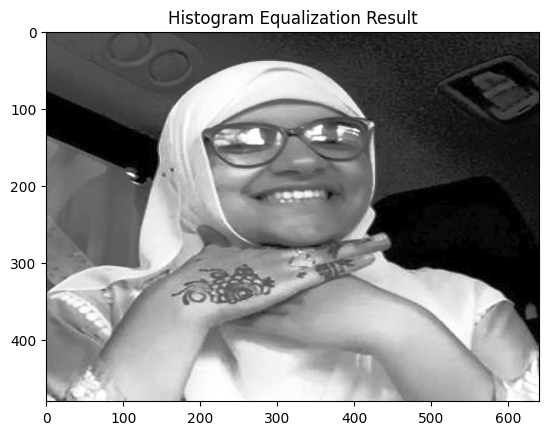

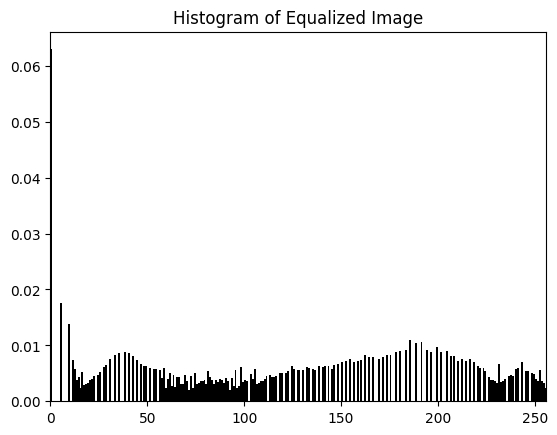

In [174]:
#e) histogram equalization
# Convert the grayscale image to an 8-bit single-channel image
hist_array = hist_convert.convert("L")

# Convert to a NumPy array
hist_array = np.array(hist_array)

# Apply built-in histogram equalization
equ = cv2.equalizeHist(hist_array)

# Display the result of histogram equalization
plt.imshow(equ, cmap=plt.cm.gray)
plt.title('Histogram Equalization Result')
plt.show()

# Plot the histogram of the result
plt.hist(equ.flatten(), bins=256, range=(0, 256), density=True, color='black')
plt.xlim([0, 256])
plt.title('Histogram of Equalized Image')
plt.show()



